In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering , DBSCAN

## Task 1:

In [53]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Downloading the Dataset 

In [54]:
df =pd.read_csv('sponge.data')

# Data Exploration

In [55]:
print("Our data-set have {} instances , and {} attributes." .format(df.shape[0], df.shape[1]))

Our data-set have 75 instances , and 46 attributes.


In [56]:
df.describe()

,3,3.1,0
count,75.000000,75.000000,75.000000
mean,1.560000,2.226667,1.000000
std,1.535525,0.894024,1.230249
min,0.000000,0.000000,0.000000
25%,0.000000,1.500000,0.000000
50%,2.000000,3.000000,0.000000
75%,3.000000,3.000000,2.000000
max,4.000000,3.000000,4.000000


In [57]:
df.head()

,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,3,NO.3,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
1,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_SCHMIDTI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO


# Data Preprocessing

__Check for missing values:__

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   AAPTOS_AAPTOS                      75 non-null     object
 1   1_CAPA                             75 non-null     object
 2   SIN_CAPA_INTERNA_DEL_CORTEX        75 non-null     object
 3   SI                                 75 non-null     object
 4   NO                                 75 non-null     object
 5   NO.1                               75 non-null     object
 6   NO.2                               75 non-null     object
 7   3                                  75 non-null     int64 
 8   NO.3                               75 non-null     object
 9   SIN_TILOSTILOS_ADICIONALES         75 non-null     object
 10  1_TIPO                             75 non-null     object
 11  NO.4                               75 non-null     object
 12  NO.5      

__One Hot Encoding:__

In [59]:
from sklearn import preprocessing
#label Encoder
category_col = df.columns

labelEncoder = preprocessing.LabelEncoder()

# creating a map of all the numerical values of each categorical labels.
mapping_dict={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

{'AAPTOS_AAPTOS': {'ALECTONA_MILLARI': 0, 'CLIONA_CARTERI': 1, 'CLIONA_CELATA': 2, 'CLIONA_LABYRINTHICA': 3, 'CLIONA_SCHMIDTI': 4, 'CLIONA_VIRIDIS': 5, 'DIPLASTRELLA_BISTELLATA': 6, 'DIPLASTRELLA_ORNATA': 7, 'LAXOSUBERITES_ECTYONIMUS': 8, 'LAXOSUBERITES_FERRERHERNANDEZI': 9, 'LAXOSUBERITES_RUGOSUS': 10, 'OXYCORDYLA_PELLITA': 11, 'POLYMASTIA_AGGLUTINARIS': 12, 'POLYMASTIA_CONIGERA': 13, 'POLYMASTIA_CORTICATA': 14, 'POLYMASTIA_ECTOFIBROSA': 15, 'POLYMASTIA_FUSCA': 16, 'POLYMASTIA_GRIMALDI': 17, 'POLYMASTIA_HIRSUTA': 18, 'POLYMASTIA_INFLATA': 19, 'POLYMASTIA_INFRAPILOSA': 20, 'POLYMASTIA_INVAGINATA': 21, 'POLYMASTIA_LITTORALIS': 22, 'POLYMASTIA_MAMMILLARIS': 23, 'POLYMASTIA_MARTAE': 24, 'POLYMASTIA_POLYTYLOTA': 25, 'POLYMASTIA_RADIOSA': 26, 'POLYMASTIA_ROBUSTA': 27, 'POLYMASTIA_SPINULA': 28, 'POLYMASTIA_TENAX': 29, 'POLYMASTIA_TISSIERI': 30, 'POLYMASTIA_UBERRIMA': 31, 'PROSUBERITES_EPIPHYTUM': 32, 'PROSUBERITES_LONGISPINA': 33, 'PROSUBERITES_RUGOSUS': 34, 'PROTELEIA_SOLLASI': 35, 'PSEUDOS

# Appling clustering algorithms 

__K-Means:__

In [60]:
# X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(df)
    inertia.append(algorithm.inertia_)

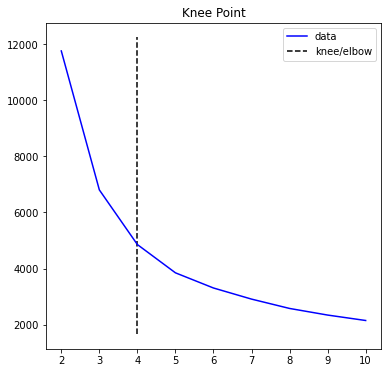

In [61]:
# using kneed to find the best k value.
kl = KneeLocator(range(2,11) , inertia, curve="convex", direction="decreasing")
kl.plot_knee()

__The best K value using the elbow method is 4.__

## Task 2:

# Downloading the Dataset 

In [62]:
data =pd.read_csv('water-treatment.data',
                  names = ["Q-E",  "ZN-E",  "PH-E",  "DBO-E",  "DQO-E",  "SS-E",  "SSV-E",  "SED-E",  "COND-E",  "PH-P"       
    ,  "DBO-P",  "SS-P",  "SSV-P",  "SED-P",  "COND-P",  "PH-D",  "DBO-D",  "DQO-D",  "SS-D",  "SSV-D"      
    ,  "SED-D",  "COND-D", "PH-S",  "DBO-S",  "DQO-S",   "SS-S",  "SSV-S",  "SED-S",  "COND-S"     
    ,  "RD-DBO-P",  "RD-SS-P",  "RD-SED-P",  "RD-DBO-S",  "RD-DQO-S",  "RD-DBO-G",  "RD-DQO-G",  "RD-SS-G",  "RD-SED-G"])



# Data Exploration

In [63]:
print("Our data-set have {} instances and {} attributes." .format(data.shape[0], data.shape[1]))

Our data-set have 527 instances and 38 attributes.


In [64]:
data.describe()

,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


In [65]:
data.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


# Data Preprocessing

__Replacing "?" with 0:__

In [66]:
data = data.replace(['?'], 0)

__Misiing Value Check:__

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, D-1/3/90 to D-30/8/91
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    object 
 1   ZN-E      527 non-null    object 
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    object 
 4   DQO-E     527 non-null    object 
 5   SS-E      527 non-null    object 
 6   SSV-E     527 non-null    object 
 7   SED-E     527 non-null    object 
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    object 
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    object 
 13  SED-P     527 non-null    object 
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    object 
 17  DQO-D     527 non-null    object 
 18  SS-D      527 non-null    object 
 19  SSV-D     527 non-null    object 
 20  SED-D     527 non-null  

# Appling clustering algorithms

__Hierarchical clustering:__

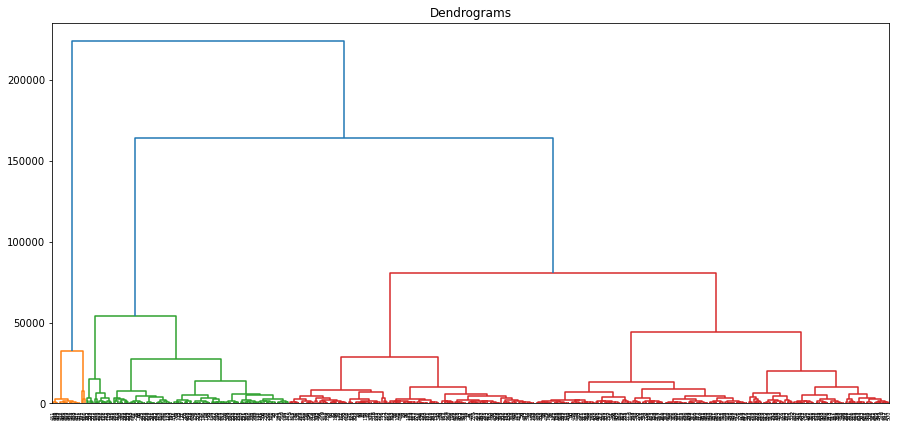

In [68]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [69]:
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred = cluster1.fit_predict(data)

In [70]:
silhouette_score(data, cluster1.fit_predict(data))

0.793351030161192

__Density Based Cluster:__

In [71]:
cluster2 = DBSCAN(eps=500, min_samples=10).fit(data)
y_pred = cluster2.fit_predict(data)

In [72]:
silhouette_score(data, cluster2.fit_predict(data))

-0.35253146318091017